# Práctica 3: Modelo dinámico inverso de un robot y planteamiento de trayectoria

## Objetivo

Que el alumno resuelva la dinámica inversa de un manipulador serial, calculando el par necesario para desplazar el efector final de un punto inicial a un punto final a lo largo de una trayectoria lineal.


### Metas 

- Que el alumno aplique un modelo cinemático inverso para calcular una trayectoria a partir de una posición actual hacia una posición final
- Que el alumno aplique un modelo de dinámica inversa a través del método de Euler Lagrange para calcular los pares en las juntas del robot
- Que el alumno grafique y analice los resultados del modelo
- Que el alumno configure un repositorio en línea e incluya en éste su práctica

### Contribución al perfil del egresado

La siguiente práctica contribuye en los siguientes puntos al perfil del egresado:

#### Aptitudes y habilidades

- Para modelar, simular e interpretar el comportamiento de los sistemas mecatrónicos.
- Para diseñar, construir, operar y mantener los sistemas mecatrónicos y sus componentes.

#### Actitudes

- Tener confianza en su preparación académica.
- Comprometido con su actualización, superación y competencia profesional.

#### De tipo social

- Promover el cambio en la mentalidad frente a la competitividad internacional.

## Rúbrica de evaluación

La evaluación de la práctica contará de los siguientes puntos y se evaluará con los siguientes criterios:

| Elemento | Porcentaje |
|------| -----------:|
| **Cuestionario previo** | 15% | 
| **Desarrollo** | 35% |
| **Análisis de resultados**  | 35% |
| **Conclusiones** | 15% |

<br>

| Elemento | Malo | Regular | Bueno |
| :------| ------ | --------| ------|
| **Cuestionario previo** | El trabajo no contiene cuestionario previo o todas las preguntas son incorrectas (0%)| Al menos la mitad de las preguntas son correctas (8%) |  Todas las preguntas son correctas (15%) |
| **Desarrollo** | El trabajo no contiene desarrollo o su planteamiento no concuerda con lo deseado (0%) | El desarrollo está mal planteado o no llega a los resultados esperados (10%) | El desarrollo tiene un planteamiento adecuado y llega a los resultados esperados (35%) |
| **Análisis de resultados**  | El trabajo no contiene análisis de resultados o la información no se está interpretando correctamente (0%) | La interpretación de los resultados es parcial o desorganizada (10%) | Realiza un correcto análisis de los resultados de forma organizada   (35%) |
| **Conclusiones** | El trabajo no contiene conclusiones o no hacen referencia al trabajo desarrollado y los objetivos planteados (0%) | La redacción de las conclusiones es desorganizada o confusa (8%) | Las conclusiones del trabajo son claras y hacen referencia al trabajo desarrollado y los objetivos planteados (15%) | 



## Introducción

### Modelo dinámico
El modelo dinámico de un sistema permite analizar el movimiento del cuerpo atendiendo a las causas que lo originan (fuerzas y pares)
En particular, para un manipulador serial, permite relacionar el par aplicado en las juntas de un robot con la posición del efector final, considerando fenómenos como la masa y la inercia.

### Modelo dinámico inverso
El modelo dinámico inverso permite conocer la posición del efector final en términos de los pares de las juntas. Para esto, se pueden tomar dos aproximaciones

### Ecuaciones de propagación
Las ecuaciones de propagación de velocidad permiten relacionar cómo el comportamiento de un eslabón dentro de una cadena cinemática afecta a los otros eslabones dentro de la cadena. Se puede analizar la propagación de las fuerzas y de la velocidad dentro de una cadena.

### Modelo Newton-Euler
Las ecuaciones de Newton-Euler relacionan la cantidad de movimiento lineal y angular con las fuerzas y pares a los que es sometido cada uno de los eslabones

### Modelo Euler-Lagrange
El modelo de Euler-Lagrange permite relacionar la energía cinética y potencial con las perturbaciones dentro de un sistema, a través del principio de mínima acción. 

## Cuestionario previo

Responder de forma breve las siguientes preguntas:

- ¿Qué es el análisis de dinámica inversa y qué nos permite obtener?
>Es un método usado para determinar las fuerzas y torques necesarios que permitan
generar un movimiento determinado en un sistema mecánico. Se fundamenta en
el análisis cinemático del movimiento, el cual incluye posiciones, velocidades y
aceleraciones, así como en las características inerciales del cuerpo, como la masa
y el momento de inercia, con el fin de identificar las fuerzas internas y externas que
deben aplicarse.
- ¿A través de qué modelados se puede realizar un análisis de dinámica inversa?
>**Método de Newton-Euler**: Se basa en las leyes de movimiento de Newton y las
ecuaciones de Euler para calcular las fuerzas y torques en cada eslabón de un
sistema mecánico.
>**Método de Lagrange**: Usa las ecuaciones de Lagrange para derivar las
ecuaciones de movimiento a partir de la energía cinética y potencial del
sistema. Es útil para sistemas con múltiples grados de libertad.
- ¿De qué condiciones ó fenómenos físicos dependen los pares en las juntas de un robot para seguir una trayectoria?
>**Cinemática del movimiento**: Las posiciones, velocidades y aceleraciones de
las juntas influyen directamente en los pares requeridos; una mayor
aceleración exige mayor par por efecto de la inercia.
>**Propiedades inerciales**: Eslabones con mayor masa o momento de inercia
necesitan más par para moverse.
>**Fricción**: La fricción en juntas y actuadores depende de la velocidad y la
carga, y debe compensarse para lograr precisión.
>**Gravedad**: El peso de cada eslabón genera cargas que deben equilibrarse con
pares adecuados para mantener la trayectoria.
- ¿Cómo se aplica la derivada total de una función que está en términos de otras variables que a su vez están en términos de la variable respecto a la que se realiza la derivada total?
>Se puede usar la regla de la cadena extendida para funciones de varias
variables. Si se tiene una función "z = f(x, y)" , donde "x" e "y" son funciones de otra
variable "t", es otras palabras, "x = g(t)" e #y = h(t)". La derivada total de "z" con
respecto a "t" se obtiene con:

$$
\tau = \frac{d}{dt} \left( \frac{\partial \mathcal{L}_a}{\partial \dot{q}} \right) - \frac{\partial \mathcal{L}_a}{\partial q}
$$

$$
\sum_{j=1}^{3} \frac{\partial}{\partial q_j} \left( \frac{\partial \mathcal{L}_a}{\partial \dot{q}} \right) \dot{q}_j + \sum_{j=1}^{3} \frac{\partial}{\partial \dot{q}_j} \left( \frac{\partial \mathcal{L}_a}{\partial \dot{q}} \right) \ddot{q}_j
$$

>donde la (parcial de dz / parcial de dx) y (parcial de dz / parcial de dy) son las
derivadas parciales de "z" con respecto a "x" e "y", respectivamente, mientras
que dxdt y dydt son las derivadas de "x" e "y" con respecto a "t".

En caso de integrar imagenes, colocarlas en la carpeta *"imagenes"*

## Desarrollo

### 1. Planteamiento de la cinemática inversa y obtención de la trayectoria
En esta primera parte, se realiza el análisis de la cinemática inversa, que permite obtener las posiciones, velocidades y aceleraciones de las juntas del robot, dada **una posición inicial de las juntas y una posición final del efector final**. Se puede retomar de la práctica anterior. 
Un diagrama del robot se muestra en la imagen:

<img src="imagenes/p3_1.png" alt = "Robot RRR" width="300" height="300" display= "block"/>

** Considerar valores cualesquiera para las dimensiones de los eslabones y la posición inicial de las juntas

In [1]:
from sympy import symbols, Matrix, diff, solve, lambdify, pi
from sympy import *
import matplotlib.pyplot as plt
import numpy as np

In [7]:
#!/usr/bin/env python3 
class GeneradorTrayectoria():
  def __init__(self, dim = (0.3, 0.3, 0.3)):
    self.dim = dim
  def trans_homo(self, x, y, z, gamma, beta, alpha):
    R_z = Matrix([ [cos(alpha), -sin(alpha), 0], [sin(alpha), cos(alpha), 0],[0, 0, 1]])
    R_y = Matrix([ [cos(beta), 0, -sin(beta)], [0, 1, 0],[sin(beta), 0, cos(beta)]])
    R_x = Matrix([ [1, 0, 0], [0, cos(gamma), -sin(gamma)],[0, sin(gamma), cos(gamma)]])
    R = R_x * R_y *R_z
    p = Matrix([[x],[y],[z]])
    T = Matrix.vstack(Matrix.hstack(R, p), Matrix([[0,0,0,1]]))
    return T 
      
  def cinematica_directa(self):
    print("Generando cinematica directa")
    self.theta_0_1, self.theta_1_2, self.theta_2_3 = symbols("theta_0_1 theta_1_2 theta_2_3")
    #Matrices de transformación
    self.T_0_1 = self.trans_homo(0, 0, 0, pi/2, 0, self.theta_0_1)
    self.T_1_2 = self.trans_homo(self.dim[0], 0, 0, 0, 0, self.theta_1_2)
    self.T_2_3 = self.trans_homo(self.dim[1], 0, 0, 0, 0, self.theta_2_3)
    self.T_3_P = self.trans_homo(self.dim[2], 0, 0, 0, 0, 0)
    self.T_0_P = simplify(self.T_0_1 * self.T_1_2 * self.T_2_3 * self.T_3_P)
    #Vector de postura xi = [x z th]
    self.xi_0_P = Matrix([[self.T_0_P[0, 3]],
                          [self.T_0_P[2, 3]],
                          [self.theta_0_1 + self.theta_1_2 + self.theta_2_3]])

  def generar_trayectoria(self, q_in=(pi/4, -pi/2, 3*pi/8), xi_fn=(0.5, 0.2, 0), tie=(0, 1), frec=30):
    print("Creando trayectoria")
    self.t, self.a_0, self.a_1, self.a_2, self.a_3, self.a_4, self.a_5 = symbols("t a_0 a_1 a_2 a_3 a_4 a_5")
    self.lam = self.a_0 + self.a_1 * self.t + self.a_2 * self.t**2 + self.a_3 * self.t**3 + self.a_4 * self.t**4 + self.a_5 * self.t**5
    self.lam_dot = diff(self.lam, self.t)
    self.lam_dot_dot = diff(self.lam_dot, self.t)

    ec_1 = self.lam.subs(self.t, tie[0])
    ec_2 = self.lam.subs(self.t, tie[1]) - 1
    ec_3 = self.lam_dot.subs(self.t, tie[0])
    ec_4 = self.lam_dot.subs(self.t, tie[1])
    ec_5 = self.lam_dot_dot.subs(self.t, tie[0])
    ec_6 = self.lam_dot_dot.subs(self.t, tie[1])
    terminos = solve([ec_1, ec_2, ec_3, ec_4, ec_5, ec_6],
                    [self.a_0, self.a_1, self.a_2, self.a_3, self.a_4, self.a_5], dict=True)

    self.lam_s = self.lam.subs(terminos[0])
    self.lam_dot_s = self.lam_dot.subs(terminos[0])
    self.lam_dot_dot_s = self.lam_dot_dot.subs(terminos[0])

    xi_in = self.xi_0_P.subs({
        self.theta_0_1: q_in[0],
        self.theta_1_2: q_in[1],
        self.theta_2_3: q_in[2]
    })

    self.xi = Matrix([
        [self.lam_s * (xi_fn[0] - xi_in[0]) + xi_in[0]],
        [self.lam_s * (xi_fn[1] - xi_in[1]) + xi_in[1]],
        [self.lam_s * (xi_fn[2] - xi_in[2]) + xi_in[2]]
    ])
    self.xi_dot = Matrix([
        [self.lam_dot_s * (xi_fn[0] - xi_in[0])],
        [self.lam_dot_s * (xi_fn[1] - xi_in[1])],
        [self.lam_dot_s * (xi_fn[2] - xi_in[2])]
    ])
    self.xi_dot_dot = Matrix([
        [self.lam_dot_dot_s * (xi_fn[0] - xi_in[0])],
        [self.lam_dot_dot_s * (xi_fn[1] - xi_in[1])],
        [self.lam_dot_dot_s * (xi_fn[2] - xi_in[2])]
    ])

    print("Vector segunda derivada")
    print(self.xi)
    print(self.xi_dot)
    print(self.xi_dot_dot)

    self.muestras = int(frec * (tie[1] - tie[0]) + 1)
    self.dt = 1.0 / frec
    self.t_m = Matrix.zeros(1, self.muestras)
    self.t_m[0, 0] = tie[0]
    for a in range(self.muestras - 1):
        self.t_m[0, a + 1] = self.t_m[0, a] + self.dt
    self.xi_m = Matrix.zeros(3, self.muestras)
    self.xi_dot_m = Matrix.zeros(3, self.muestras)
    self.xi_dot_dot_m = Matrix.zeros(3, self.muestras)

    xi_m_func = lambdify([self.t], self.xi)
    xi_dot_m_func = lambdify([self.t], self.xi_dot)
    xi_dot_dot_m_func = lambdify([self.t], self.xi_dot_dot)

    for a in range(self.muestras):
        self.xi_m[:, a] = xi_m_func(float(self.t_m[0, a]))
        self.xi_dot_m[:, a] = xi_dot_m_func(float(self.t_m[0, a]))
        self.xi_dot_dot_m[:, a] = xi_dot_dot_m_func(float(self.t_m[0, a]))
        print(a)

    self.q_in = q_in

  def cinematica_inversa(self):
    print("Calculando cinematica inversa")
    # Variables para los valores de las velocidades del ws
    self.x_0_P_dot, self.z_0_P_dot, self.theta_0_P_dot = symbols(
    "x_0_P_dot z_0_P_dot theta_0_P_dot")
    # Derivada del vector de postura en términos de las velocidades del efector final
    # xi' = [x' z' th'] 
    self.xi_dot = Matrix([[self.x_0_P_dot], [self.z_0_P_dot], [self.theta_0_P_dot]])
    # Jacobiano
    self.J = Matrix.hstack(diff(self.xi_0_P, self.theta_0_1), 
                           diff(self.xi_0_P, self.theta_1_2), 
                           diff(self.xi_0_P, self.theta_2_3))
    self.J_inv = self.J.inv()
    # De la primera derivada, despejamos q': 
    # xi' = J * q'
    # q' = J-1 * xi'
    self.q_dot = self.J_inv * self.xi_dot

    # Crear una función a partir de la expresión simbólica
    self.q_dot_func = lambdify([self.x_0_P_dot, self.z_0_P_dot, self.theta_0_P_dot, self.theta_0_1, self.theta_1_2, self.theta_2_3], self.q_dot)

    # Matrices vacías para los valores de espacio de las juntas
    self.q_m         = Matrix.zeros(3, self.muestras)
    self.q_dot_m     = Matrix.zeros(3, self.muestras)
    self.q_dot_dot_m = Matrix.zeros(3, self.muestras)
    # Agregando posición inicial (dato)
    self.q_m[:,0] = Matrix([[self.q_in[0]], [self.q_in[1]], [self.q_in[2]]])
    # Agregando velocidad inicial
    # q' = J-1 * xi' => Obtenemos velocidad de las juntas 
    # en el punto actual sustituyendo velocidad actual del efector y 
    # posición actual de las juntas
    self.q_dot_m[:, 0] = self.q_dot_func(
        float(self.xi_dot_m[0, 0]),
        float(self.xi_dot_m[1, 0]),
        float(self.xi_dot_m[2, 0]),
        float(self.q_m[0, 0]),
        float(self.q_m[1, 0]),
        float(self.q_m[2, 0])
    )
    print("Calculando puntos")
    for a in range(self.muestras - 1):
      # Posición de las juntas
      # Posición siguiente = posición actual + velocidad actual * dt 
      self.q_m[:,a+1] = self.q_m[:,a] + self.q_dot_m[:,a] * self.dt
      # Velocidad de las juntas 
      # Velocidad siguiente de las juntas a partir de velocidad siguiente del efector y posición siguiente de las juntas
      self.q_dot_m[:, a + 1] = self.q_dot_func(
        float(self.xi_dot_m[0, a + 1]),
        float(self.xi_dot_m[1, a + 1]),
        float(self.xi_dot_m[2, a + 1]),
        float(self.q_m[0, a + 1]),
        float(self.q_m[1, a + 1]),
        float(self.q_m[2, a + 1]))
        
      # Aceleración
      # Aceleración actual = velocidad siguiente - velocidad actual / dt
      self.q_dot_dot_m[:,a] = (self.q_dot_m[:,a+1] - self.q_dot_m[:,a]) / self.dt

      print("Iteración: " + str(a))
    # Aceleración final (cero)
    self.q_dot_dot_m[:, self.muestras - 1] = Matrix.zeros(3, 1)

### 2. Planteamiento de la dinámica inversa

### a) Planteamiento de la dinámica inversa: Matrices de inercia

Calcular las matrices de inercia de los eslabones considerando que su centro de masa concide con su centroide y constan de un prisma con las dimensiones usadas en el archivo URDF del robot.

In [5]:
class GeneradorDinamica(GeneradorTrayectoria): 
    def __init__(self):
        super().__init__()
    def matriz_inercia(self, lx, ly, lz, masa):
        return Matrix([[(masa/12.0)*(ly**2 + lz**2), 0, 0], 
                  [0, (masa/12.0)*(lx**2 + lz**2), 0], 
                  [0, 0, (masa/12.0)*(lx**2 + ly**2)]])

### b) Planteamiento de la dinámica inversa: Posiciones de los centros de masa
A partir de las matrices de transformación homogénea, obtener la posición de los centros de masa de los eslabones.

In [9]:
def definir_inercia_ex(self, masas = [0.25, 0.25, 0.25]):
    # Cinematica directa de cada sistema de referencia
    self.T_0_2 = self.T_0_1 * self.T_1_2
    self.T_0_3 = self.T_0_2 * self.T_2_3
    # Transformaciones de centros de masa
    self.T_1_C1 = self.trans_homo(self.dim[0] / 2, 0, 0, 0, 0, 0)
    self.T_2_C2 = self.trans_homo(self.dim[1] / 2, 0, 0, 0, 0, 0)
    self.T_3_C3 = self.trans_homo(self.dim[2] / 2, 0, 0, 0, 0, 0)
    self.T_0_C1 = simplify(self.T_0_1 * self.T_1_C1)
    self.T_0_C2 = simplify(self.T_0_2 * self.T_2_C2)
    self.T_0_C3 = simplify(self.T_0_3 * self.T_3_C3)
    #Vectores de posición de sistemas de referencia
    self.p_0_1 = self.T_0_1[:3, 3]
    self.p_1_2 = self.T_1_2[:3, 3]
    self.p_2_3 = self.T_2_3[:3, 3]
    self.p_0_1 = self.T_0_1[:3, 3]
    self.p_0_2 = self.T_0_2[:3, 3]
    self.p_0_3 = self.T_0_3[:3, 3]
    #Vectores de posición de centros de masa
    self.p_1_C1 = self.T_1_C1[:3, 3]
    self.p_2_C2 = self.T_2_C2[:3, 3]
    self.p_3_C3 = self.T_3_C3[:3, 3]
    self.p_0_C1 = self.T_0_C1[:3, 3]
    self.p_0_C2 = self.T_0_C2[:3, 3]
    self.p_0_C3 = self.T_0_C3[:3, 3]
    #Rotaciones
    self.R_0_1 = self.T_0_1[:3, :3]
    self.R_1_2 = self.T_1_2[:3, :3]
    self.R_2_3 = self.T_2_3[:3, :3]
    self.Id = Matrix([[1,0,0], [0,1,0], [0,0,1]]) 
    # Variables de velocidad angular
    self.theta_0_1_dot = Symbol('theta_0_1_dot')
    self.theta_1_2_dot = Symbol('theta_1_2_dot')
    self.theta_2_3_dot = Symbol('theta_2_3_dot')
    # Variables de aceleración angular
    self.theta_0_1_dot_dot = Symbol('theta_0_1_dot_dot')
    self.theta_1_2_dot_dot = Symbol('theta_1_2_dot_dot')
    self.theta_2_3_dot_dot = Symbol('theta_2_3_dot_dot')
    # Masas
    self.m1 = masas[0]
    self.m2 = masas[1]
    self.m3 = masas[2]
    # Matrices de inercia
    self.Ic1 = self.matriz_inercia(self.dim[0], 0.03, 0.03, self.m1)
    self.Ic2 = self.matriz_inercia(self.dim[0], 0.03, 0.03, self.m2)
    self.Ic3 = self.matriz_inercia(self.dim[0], 0.03, 0.03, self.m3)
    #Gravedad
    self.g = -9.81

GeneradorDinamica.definir_inercia_in = definir_inercia_ex
generador_trayectoria = GeneradorDinamica()
generador_trayectoria.cinematica_directa()
generador_trayectoria.generar_trayectoria()
generador_trayectoria.cinematica_inversa()
generador_trayectoria.definir_inercia_in()

Generando cinematica directa
Creando trayectoria
Vector segunda derivada
Matrix([[(-0.3*sqrt(2) - 0.3*sqrt(sqrt(2)/4 + 1/2) + 0.5)*(6*t**5 - 15*t**4 + 10*t**3) + 0.3*sqrt(sqrt(2)/4 + 1/2) + 0.3*sqrt(2)], [(0.2 - 0.3*sqrt(1/2 - sqrt(2)/4))*(6*t**5 - 15*t**4 + 10*t**3) + 0.3*sqrt(1/2 - sqrt(2)/4)], [-pi*(6*t**5 - 15*t**4 + 10*t**3)/8 + pi/8]])
Matrix([[(-0.3*sqrt(2) - 0.3*sqrt(sqrt(2)/4 + 1/2) + 0.5)*(30*t**4 - 60*t**3 + 30*t**2)], [(0.2 - 0.3*sqrt(1/2 - sqrt(2)/4))*(30*t**4 - 60*t**3 + 30*t**2)], [-pi*(30*t**4 - 60*t**3 + 30*t**2)/8]])
Matrix([[(-0.3*sqrt(2) - 0.3*sqrt(sqrt(2)/4 + 1/2) + 0.5)*(120*t**3 - 180*t**2 + 60*t)], [(0.2 - 0.3*sqrt(1/2 - sqrt(2)/4))*(120*t**3 - 180*t**2 + 60*t)], [-pi*(120*t**3 - 180*t**2 + 60*t)/8]])
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
Calculando cinematica inversa
Calculando puntos
Iteración: 0
Iteración: 1
Iteración: 2
Iteración: 3
Iteración: 4
Iteración: 5
Iteración: 6
Iteración: 7
Iteración: 8
Iteración: 9
Iter

### c) Planteamiento de la dinámica inversa: Velocidades de los centros de masa

A partir de las ecuaciones de propagación de la velocidad, obtener la velocidad lineal y angular de los centros de masa de los eslabones.

In [15]:
def generar_velocidades_ex(self):
    #Velocidades angulares de sistemas
    omega_1_1 = Matrix([0, 0, self.theta_0_1_dot])
    omega_2_2 = self.R_1_2.transpose() @ omega_1_1 + Matrix([0, 0, self.theta_1_2_dot])
    omega_3_3 = self.R_2_3.transpose() @ omega_2_2 + Matrix([0, 0, self.theta_2_3_dot]) 
    #Velocidades angulares de centros de masa
    self.omega_1_C1 = omega_1_1
    self.omega_2_C2 = omega_2_2
    self.omega_3_C3 = omega_3_3
    omega_1_C1_f = lambdify([self.theta_0_1_dot], self.omega_1_C1)
    omega_2_C2_f = lambdify([self.theta_0_1_dot, self.theta_1_2_dot], self.omega_2_C2)
    omega_3_C3_f = lambdify([self.theta_0_1_dot, self.theta_1_2_dot, self.theta_2_3], self.omega_3_C3)
    #Velocidades lineales de sistemas
    v_1_1 = Matrix([0, 0, 0])
    v_2_2 = self.R_1_2.transpose() @ (v_1_1 + omega_1_1.cross(self.p_1_2))
    v_3_3 = self.R_2_3.transpose() @ (v_2_2 + omega_2_2.cross(self.p_2_3))
    #Velocidades lineales de centros de masa
    self.v_1_C1 = v_1_1 + self.omega_1_C1.cross(self.p_1_C1)
    self.v_2_C2 = v_2_2 + self.omega_2_C2.cross(self.p_2_C2)
    self.v_3_C3 = v_3_3 + self.omega_3_C3.cross(self.p_3_C3)
    v_1_C1_f = lambdify([self.theta_0_1, self.theta_0_1_dot], self.v_1_C1)
    v_2_C2_f = lambdify([self.theta_0_1, self.theta_0_1_dot, self.theta_1_2, self.theta_1_2_dot], self.v_2_C2)
    v_3_C3_f = lambdify([self.theta_0_1, self.theta_0_1_dot, self.theta_1_2, self.theta_1_2_dot, self.theta_2_3, self.theta_2_3_dot], self.v_3_C3)

    #Arreglos para guardar velocidades angulares
    # 3 filas, n columnas (cada columna es una velocidad angular del centro de masa en un instante)
    self.omega_1_C1_m = Matrix.zeros(3, self.muestras)
    self.omega_2_C2_m = Matrix.zeros(3, self.muestras)
    self.omega_3_C3_m = Matrix.zeros(3, self.muestras)
    #Arreglos para guardar velocidades lineales
    # 3 filas, n columnas (cada columna es una velocidad lineal del centro de masa en un instante)
    self.vel_1_C1_m = Matrix.zeros(3, self.muestras)
    self.vel_2_C2_m = Matrix.zeros(3, self.muestras)
    self.vel_3_C3_m = Matrix.zeros(3, self.muestras)
    #Ciclo para todas las muestras
    print("Calculando velocidades")
    for i in range(self.muestras):
      #Velocidades angulares
      self.omega_1_C1_m[:, i] = omega_1_C1_f(self.q_dot_m[0, i])
      self.omega_2_C2_m[:, i] = omega_2_C2_f(self.q_dot_m[0, i], self.q_dot_m[1, i])
      self.omega_3_C3_m[:, i] = omega_3_C3_f(self.q_dot_m[0, i], self.q_dot_m[1, i], self.q_dot_m[2, i])
      
      #Velocidades lineales
      self.vel_1_C1_m[:, i] = self.v_1_C1.subs({
        self.theta_0_1:     self.q_m[0, i],
        self.theta_0_1_dot: self.q_dot_m[0, i]
      })
      self.vel_2_C2_m[:, i] = self.v_2_C2.subs({
        self.theta_0_1:     self.q_m[0, i],
        self.theta_0_1_dot: self.q_dot_m[0, i],
        self.theta_1_2:     self.q_m[1, i],
        self.theta_1_2_dot: self.q_dot_m[1, i]
      })
      self.vel_3_C3_m[:, i] = self.v_2_C2.subs({
        self.theta_0_1:     self.q_m[0, i],
        self.theta_0_1_dot: self.q_dot_m[0, i],
        self.theta_1_2:     self.q_m[1, i],
        self.theta_1_2_dot: self.q_dot_m[1, i],
        self.theta_2_3:     self.q_m[2, i],
        self.theta_2_3_dot: self.q_dot_m[2, i]
      })
      print(i)

GeneradorDinamica.generar_velocidades_in = generar_velocidades_ex
generador_trayectoria = GeneradorDinamica()
generador_trayectoria.cinematica_directa()
generador_trayectoria.generar_trayectoria()
generador_trayectoria.cinematica_inversa()
generador_trayectoria.definir_inercia_in()
generador_trayectoria.generar_velocidades_in()

Generando cinematica directa
Creando trayectoria
Vector segunda derivada
Matrix([[(-0.3*sqrt(2) - 0.3*sqrt(sqrt(2)/4 + 1/2) + 0.5)*(6*t**5 - 15*t**4 + 10*t**3) + 0.3*sqrt(sqrt(2)/4 + 1/2) + 0.3*sqrt(2)], [(0.2 - 0.3*sqrt(1/2 - sqrt(2)/4))*(6*t**5 - 15*t**4 + 10*t**3) + 0.3*sqrt(1/2 - sqrt(2)/4)], [-pi*(6*t**5 - 15*t**4 + 10*t**3)/8 + pi/8]])
Matrix([[(-0.3*sqrt(2) - 0.3*sqrt(sqrt(2)/4 + 1/2) + 0.5)*(30*t**4 - 60*t**3 + 30*t**2)], [(0.2 - 0.3*sqrt(1/2 - sqrt(2)/4))*(30*t**4 - 60*t**3 + 30*t**2)], [-pi*(30*t**4 - 60*t**3 + 30*t**2)/8]])
Matrix([[(-0.3*sqrt(2) - 0.3*sqrt(sqrt(2)/4 + 1/2) + 0.5)*(120*t**3 - 180*t**2 + 60*t)], [(0.2 - 0.3*sqrt(1/2 - sqrt(2)/4))*(120*t**3 - 180*t**2 + 60*t)], [-pi*(120*t**3 - 180*t**2 + 60*t)/8]])
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
Calculando cinematica inversa
Calculando puntos
Iteración: 0
Iteración: 1
Iteración: 2
Iteración: 3
Iteración: 4
Iteración: 5
Iteración: 6
Iteración: 7
Iteración: 8
Iteración: 9
Iter

### d) Cálculo del Lagrangiano
Para calcular el Lagrangiano, calcular también las energías cinética y potencial de cada eslabón, y sumarlas. 

In [17]:
def energias_cin_pot_ex(self):
    #Euler-Lagrange
    #Energía cinética
    k1 = 0.5 * self.m1 * self.v_1_C1.dot(self.v_1_C1) + 0.5 * self.omega_1_C1.dot(self.Ic1@self.omega_1_C1)
    k2 = 0.5 * self.m2 * self.v_2_C2.dot(self.v_2_C2) + 0.5 * self.omega_2_C2.dot(self.Ic2@self.omega_2_C2)
    k3 = 0.5 * self.m3 * self.v_3_C3.dot(self.v_3_C3) + 0.5 * self.omega_3_C3.dot(self.Ic3@self.omega_3_C3)
    k = k1 + k2 + k3
    #Energía potencial
    u1 = - self.m1 * Matrix([0, 0, self.g]).dot(self.p_0_C1)
    u2 = - self.m2 * Matrix([0, 0, self.g]).dot(self.p_0_C2)
    u3 = - self.m3 * Matrix([0, 0, self.g]).dot(self.p_0_C3)
    u = u1 + u2 + u3
    #Lagrangiano
    La = k - u
    #Derivadas respecto al espacio de trabajo
    self.La_dot_q = Matrix([diff(La, self.theta_0_1), 
                       diff(La, self.theta_1_2), 
                       diff(La, self.theta_2_3)])
    #Derivadas respecto a la derivada del espacio de trabajo
    La_dot_q_dot = Matrix([diff(La, self.theta_0_1_dot), 
                            diff(La, self.theta_1_2_dot), 
                            diff(La, self.theta_2_3_dot)])
    #Derivada total
    self.La_dot_q_dot_dt = diff(La_dot_q_dot, self.theta_0_1) * self.theta_0_1_dot + diff(La_dot_q_dot, self.theta_1_2) * self.theta_1_2_dot + diff(La_dot_q_dot, self.theta_2_3) * self.theta_2_3_dot     + diff(La_dot_q_dot, self.theta_0_1_dot) * self.theta_0_1_dot_dot + diff(La_dot_q_dot, self.theta_1_2_dot) * self.theta_1_2_dot_dot + diff(La_dot_q_dot, self.theta_2_3_dot) * self.theta_2_3_dot_dot

GeneradorDinamica.energias_cin_pot_in = energias_cin_pot_ex
generador_trayectoria = GeneradorDinamica()
generador_trayectoria.cinematica_directa()
generador_trayectoria.generar_trayectoria()
generador_trayectoria.cinematica_inversa()
generador_trayectoria.definir_inercia_in()
generador_trayectoria.generar_velocidades_in()
generador_trayectoria.energias_cin_pot_in()

Generando cinematica directa
Creando trayectoria
Vector segunda derivada
Matrix([[(-0.3*sqrt(2) - 0.3*sqrt(sqrt(2)/4 + 1/2) + 0.5)*(6*t**5 - 15*t**4 + 10*t**3) + 0.3*sqrt(sqrt(2)/4 + 1/2) + 0.3*sqrt(2)], [(0.2 - 0.3*sqrt(1/2 - sqrt(2)/4))*(6*t**5 - 15*t**4 + 10*t**3) + 0.3*sqrt(1/2 - sqrt(2)/4)], [-pi*(6*t**5 - 15*t**4 + 10*t**3)/8 + pi/8]])
Matrix([[(-0.3*sqrt(2) - 0.3*sqrt(sqrt(2)/4 + 1/2) + 0.5)*(30*t**4 - 60*t**3 + 30*t**2)], [(0.2 - 0.3*sqrt(1/2 - sqrt(2)/4))*(30*t**4 - 60*t**3 + 30*t**2)], [-pi*(30*t**4 - 60*t**3 + 30*t**2)/8]])
Matrix([[(-0.3*sqrt(2) - 0.3*sqrt(sqrt(2)/4 + 1/2) + 0.5)*(120*t**3 - 180*t**2 + 60*t)], [(0.2 - 0.3*sqrt(1/2 - sqrt(2)/4))*(120*t**3 - 180*t**2 + 60*t)], [-pi*(120*t**3 - 180*t**2 + 60*t)/8]])
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
Calculando cinematica inversa
Calculando puntos
Iteración: 0
Iteración: 1
Iteración: 2
Iteración: 3
Iteración: 4
Iteración: 5
Iteración: 6
Iteración: 7
Iteración: 8
Iteración: 9
Iter

### e) Pares en las juntas
Para calcular los pares en las juntas del robot, calcular las parciales del Lagrangiano respecto a las variables que lo componen, y sustituirlas en la ecuación de Euler-Lagrange.

In [18]:
def pares_juntas_ex(self):
    #Pares en las juntas 
    tau = self.La_dot_q_dot_dt - self.La_dot_q
    tau_f = lambdify([self.theta_0_1, self.theta_1_2, self.theta_2_3, 
                      self.theta_0_1_dot, self.theta_1_2_dot, self.theta_2_3_dot, 
                      self.theta_0_1_dot_dot, self.theta_1_2_dot_dot, self.theta_2_3_dot_dot], tau)
    #Generar valores numéricos
    self.tau_val = Matrix.zeros(3, self.muestras)
    #Ciclo para todas las muestras
    print("Calculando pares")
    for i in range(self.muestras):
      self.tau_val[:, i] = tau.subs({self.theta_0_1 : self.q_m[0, i], self.theta_1_2: self.q_m[1, i], self.theta_2_3 : self.q_m[2, i],
                            self.theta_0_1_dot:self.q_dot_m[0, i], self.theta_1_2_dot:self.q_dot_m[1, i], self.theta_2_3_dot:self.q_dot_m[2, i], 
                            self.theta_0_1_dot_dot:self.q_dot_dot_m[0, i], self.theta_1_2_dot_dot:self.q_dot_dot_m[1, i], self.theta_2_3_dot_dot:self.q_dot_dot_m[2, i]})
      print(i)

GeneradorDinamica.pares_juntas_in = pares_juntas_ex
generador_trayectoria = GeneradorDinamica()
generador_trayectoria.cinematica_directa()
generador_trayectoria.generar_trayectoria()
generador_trayectoria.cinematica_inversa()
generador_trayectoria.definir_inercia_in()
generador_trayectoria.generar_velocidades_in()
generador_trayectoria.energias_cin_pot_in()
generador_trayectoria.pares_juntas_in()

Generando cinematica directa
Creando trayectoria
Vector segunda derivada
Matrix([[(-0.3*sqrt(2) - 0.3*sqrt(sqrt(2)/4 + 1/2) + 0.5)*(6*t**5 - 15*t**4 + 10*t**3) + 0.3*sqrt(sqrt(2)/4 + 1/2) + 0.3*sqrt(2)], [(0.2 - 0.3*sqrt(1/2 - sqrt(2)/4))*(6*t**5 - 15*t**4 + 10*t**3) + 0.3*sqrt(1/2 - sqrt(2)/4)], [-pi*(6*t**5 - 15*t**4 + 10*t**3)/8 + pi/8]])
Matrix([[(-0.3*sqrt(2) - 0.3*sqrt(sqrt(2)/4 + 1/2) + 0.5)*(30*t**4 - 60*t**3 + 30*t**2)], [(0.2 - 0.3*sqrt(1/2 - sqrt(2)/4))*(30*t**4 - 60*t**3 + 30*t**2)], [-pi*(30*t**4 - 60*t**3 + 30*t**2)/8]])
Matrix([[(-0.3*sqrt(2) - 0.3*sqrt(sqrt(2)/4 + 1/2) + 0.5)*(120*t**3 - 180*t**2 + 60*t)], [(0.2 - 0.3*sqrt(1/2 - sqrt(2)/4))*(120*t**3 - 180*t**2 + 60*t)], [-pi*(120*t**3 - 180*t**2 + 60*t)/8]])
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
Calculando cinematica inversa
Calculando puntos
Iteración: 0
Iteración: 1
Iteración: 2
Iteración: 3
Iteración: 4
Iteración: 5
Iteración: 6
Iteración: 7
Iteración: 8
Iteración: 9
Iter

### 3. Gráficas de pares en las juntas
Graficar los resultados obtenidos en el punto anterior.

Generando cinematica directa
Creando trayectoria
Vector segunda derivada
Matrix([[(-0.3*sqrt(2) - 0.3*sqrt(sqrt(2)/4 + 1/2) + 0.5)*(6*t**5 - 15*t**4 + 10*t**3) + 0.3*sqrt(sqrt(2)/4 + 1/2) + 0.3*sqrt(2)], [(0.2 - 0.3*sqrt(1/2 - sqrt(2)/4))*(6*t**5 - 15*t**4 + 10*t**3) + 0.3*sqrt(1/2 - sqrt(2)/4)], [-pi*(6*t**5 - 15*t**4 + 10*t**3)/8 + pi/8]])
Matrix([[(-0.3*sqrt(2) - 0.3*sqrt(sqrt(2)/4 + 1/2) + 0.5)*(30*t**4 - 60*t**3 + 30*t**2)], [(0.2 - 0.3*sqrt(1/2 - sqrt(2)/4))*(30*t**4 - 60*t**3 + 30*t**2)], [-pi*(30*t**4 - 60*t**3 + 30*t**2)/8]])
Matrix([[(-0.3*sqrt(2) - 0.3*sqrt(sqrt(2)/4 + 1/2) + 0.5)*(120*t**3 - 180*t**2 + 60*t)], [(0.2 - 0.3*sqrt(1/2 - sqrt(2)/4))*(120*t**3 - 180*t**2 + 60*t)], [-pi*(120*t**3 - 180*t**2 + 60*t)/8]])
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
Calculando cinematica inversa
Calculando puntos
Iteración: 0
Iteración: 1
Iteración: 2
Iteración: 3
Iteración: 4
Iteración: 5
Iteración: 6
Iteración: 7
Iteración: 8
Iteración: 9
Iter

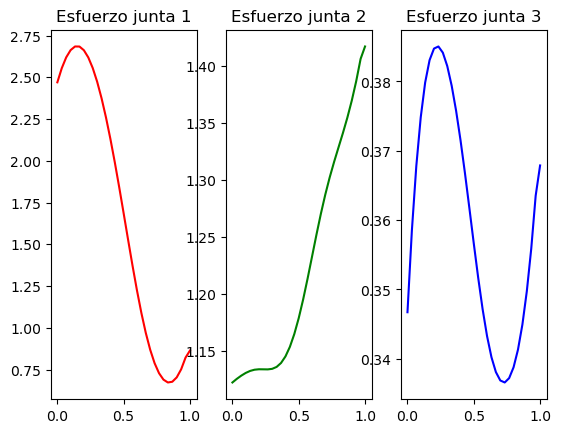

In [19]:
def graficar_esfuerzos_ex(self): 
    fig, ((tau_1_g, tau_2_g, tau_3_g)) = plt.subplots(nrows=1, ncols = 3)
    # Posiciones ws
    tau_1_g.set_title("Esfuerzo junta 1")
    tau_1_g.plot(self.t_m.T, self.tau_val[0, :].T, color = "RED")

    # Velocidades ws
    tau_2_g.set_title("Esfuerzo junta 2")
    tau_2_g.plot(self.t_m.T, self.tau_val[1, :].T, color = "GREEN")

    # Aceleraciones ws
    tau_3_g.set_title("Esfuerzo junta 3")
    tau_3_g.plot(self.t_m.T, self.tau_val[2, :].T, color = "BLUE")

GeneradorDinamica.graficar_esfuerzos_in = graficar_esfuerzos_ex
generador_trayectoria = GeneradorDinamica()
generador_trayectoria.cinematica_directa()
generador_trayectoria.generar_trayectoria()
generador_trayectoria.cinematica_inversa()
generador_trayectoria.definir_inercia_in()
generador_trayectoria.generar_velocidades_in()
generador_trayectoria.energias_cin_pot_in()
generador_trayectoria.pares_juntas_in()
generador_trayectoria.graficar_esfuerzos_in()

### 4. Github
Para terminar, subir los archivos de la práctica al repositorio de github

## Análisis de resultados

¿Qué utilidad tiene el modelo de dinámica inversa de un robot?
> El modelo de dinámica inversa nos ayuda a hacer un análisis completo de nuestro
robot, nos permite planear trayectorias y hacer que los movimientos sean
eficientes y precisos, para poder simularlo antes de probar en la vida real y mejorar
su rendimiento.

## Conclusiones

En esta sección deberan escribir las conclusiones de la práctica con base en el objetivo planteado y las metas que se deban cumplir para su realización.

>Para calcular la cinemática inversa se necesita establecer las ecuaciones que
relacionan las coordenadas del espacio de trabajo con los ángulos de los
eslabones y además implementar el Jacobiano, que va a vincular las velocidades
articulares con las velocidades del extremo del robot, resolviendo así los sistemas
de ecuaciones. El cálculo de velocidades para el centro de masas requiere derivar
las posiciones respecto al tiempo, lo que se hace mediante las matrices de
transformación homogénea y las velocidades articulares relacionadas con el
centro de masas de cada eslabón. Para las inercias es necesario incluir las
matrices de inercia, que dependen de la distribución de masa y geometría de los
eslabones, siendo necesarias para determinar las fuerzas y momentos en la
dinámica inversa. Finalmente, las gráficas se generan utilizando las
transformaciones homogéneas para representar visualmente las posiciones de los
eslabones, lo que permite observar la configuración del robot en cada instante.

## Bibliografía 

En caso de usarse, se deben hacer referencia a la información implementada en formato ieee.


